# Importing Libraries and Loading Dataset


In [ ]:
import pandas as pd
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("covid19_tweets.csv")
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624.0,950.0,18775.0,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253.0,1677.0,24.0,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275.0,9525.0,7254.0,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197.0,987.0,1488.0,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009.0,168.0,101.0,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8208,OpenMind eDesign,NOIDA,"Partnering with colleges, universities, and Ed...",2020-05-08 15:04:46,16.0,130.0,0.0,False,2020-07-25 07:11:31,The perfect #SaturdayThought of the week.\n\n#...,"['SaturdayThought', 'quoteoftheweek', 'quotes'...",Twitter Web App,False
8209,Riikka Kevo,Finland,The Future is Here. #Covid19 #Urbanism #Optimi...,2017-02-19 13:09:04,659.0,1611.0,16309.0,False,2020-07-25 07:11:31,⁦@TheLancet Small study of #NeonatalManagemenA...,"['NeonatalManagemenAndOutcomes', 'COVID19']",Twitter for iPhone,False
8210,Covid Tracking India,India,"Covind-19 news, facts, insights & analytics.\n...",2020-04-01 19:33:18,1423.0,321.0,334.0,False,2020-07-25 07:11:28,CDC: One-third of #COVID19 patients who aren't...,['COVID19'],Twitter Web App,False
8211,Daphne Jocelyn Lull,NaN,"Surface Pattern Designer & Zazzler Your ""go to...",2019-01-07 18:09:24,70.0,97.0,6612.0,False,2020-07-25 07:11:21,#COVID19 masks in solidarity with Spain https:...,['COVID19'],Twitter Web App,False


#Data Cleaning

In [ ]:
df.columns #columns in our dataset

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [ ]:
df.dtypes #datatypes of the columns

user_name            object
user_location        object
user_description     object
user_created         object
user_followers      float64
user_friends        float64
user_favourites     float64
user_verified        object
date                 object
text                 object
hashtags             object
source               object
is_retweet           object
dtype: object

In [ ]:
df['source'].unique() #sources value, where are the tweeets coming from

array(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App',
       'Buffer', 'TweetDeck', 'Twitter for iPad', 'Africa Newsroom',
       'Blood Donors India', 'TweetCaster for Android',
       'Alexander Higgins', 'IFTTT', 'Hootsuite Inc.', 'Sprout Social',
       'Sprinklr', 'assarofficial', 'IAMBLOG2TWITTER', 'CrowdControlHQ',
       'COVID19-Updates', 'EveryoneSocial', 'Dynamic Signal', 'Instagram',
       'TweetCaster for iOS', 'GlobalPandemic.NET', 'Venrap Radio',
       'HeyOrca', 'Twitter for Advertisers', 'Paper.li',
       'Twitter Media Studio', 'Twitter for Mac', 'dlvr.it',
       'Cheap Bots, Done Quick!', 'Prof. Shanku', 'LaterMedia',
       'SEMrush Social Media Tool', 'Twitterrific for iOS',
       "Sebastian's Twitter Bot", 'Threader_client', 'COVID19FactoidBot',
       'PwC UK SMART', 'tweet pro stiff', 'UK COVID-19 Alerts',
       'Resistbot Open Letters', 'preprint-alert', 'ContentStudio.io',
       'Peeping Moon', 'TweetAutomaticos', 'Orlo', 'AgoraPulse Ma

In [ ]:
df['source'].value_counts() #count of the tweets from varius sources

source
Twitter Web App        2263
Twitter for Android    2112
Twitter for iPhone     1598
TweetDeck               425
Hootsuite Inc.          266
                       ... 
Restream.io               1
Swat.io                   1
dailyindia                1
Sked Social               1
Konnect Social            1
Name: count, Length: 186, dtype: int64

In [ ]:
!pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.8 MB/s eta 0:00:00


In [ ]:
import neattext.functions as nfx #removing the date,emojis, hashtags and other characters

In [ ]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
df['text']

0       If I smelled the scent of hand sanitizers toda...
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...
3       @brookbanktv The one gift #COVID19 has give me...
4       25 July : Media Bulletin on Novel #CoronaVirus...
                              ...                        
8208    The perfect #SaturdayThought of the week.\n\n#...
8209    ⁦@TheLancet Small study of #NeonatalManagemenA...
8210    CDC: One-third of #COVID19 patients who aren't...
8211    #COVID19 masks in solidarity with Spain https:...
8212                                                  NaN
Name: text, Length: 8213, dtype: object

In [ ]:
df['text'].iloc[0]

'If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0'

Noise:
1.remove hashtags/ userhandles
2.urls
3.emojis
4.special char

In [ ]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624.0,950.0,18775.0,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253.0,1677.0,24.0,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275.0,9525.0,7254.0,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197.0,987.0,1488.0,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009.0,168.0,101.0,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [ ]:
df['text'] = df['text'].astype(str)


In [ ]:
df['text'].apply(nfx.extract_hashtags)  #removing hashtags from text

0                                                      []
1                                                      []
2                                              [#COVID19]
3                                              [#COVID19]
4                         [#CoronaVirusUpdates, #COVID19]
                              ...                        
8208    [#SaturdayThought, #quoteoftheweek, #quotes, #...
8209            [#NeonatalManagemenAndOutcomes, #COVID19]
8210                                           [#COVID19]
8211                                           [#COVID19]
8212                                                   []
Name: text, Length: 8213, dtype: object

In [ ]:
df['extracted_hashtags'] = df['text'].apply(nfx.extract_hashtags)

In [ ]:
df[['extracted_hashtags','hashtags']] #comparing the two

,extracted_hashtags,hashtags
0,[],NaN
1,[],NaN
2,[#COVID19],['COVID19']
3,[#COVID19],['COVID19']
4,"[#CoronaVirusUpdates, #COVID19]","['CoronaVirusUpdates', 'COVID19']"
...,...,...
8208,"[#SaturdayThought, #quoteoftheweek, #quotes, #...","['SaturdayThought', 'quoteoftheweek', 'quotes'..."
8209,"[#NeonatalManagemenAndOutcomes, #COVID19]","['NeonatalManagemenAndOutcomes', 'COVID19']"
8210,[#COVID19],['COVID19']
8211,[#COVID19],['COVID19']


In [ ]:
df['clean_tweet']= df['text'].apply(nfx.remove_hashtags)

In [ ]:
df[['text','clean_tweet']]

,text,clean_tweet
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,@brookbanktv The one gift #COVID19 has give me...,@brookbanktv The one gift has give me is an ...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel \n@kansa...
...,...,...
8208,The perfect #SaturdayThought of the week.\n\n#...,The perfect of the week.\n\n ht...
8209,⁦@TheLancet Small study of #NeonatalManagemenA...,⁦@TheLancet Small study of during pandemic...
8210,CDC: One-third of #COVID19 patients who aren't...,CDC: One-third of patients who aren't hospit...
8211,#COVID19 masks in solidarity with Spain https:...,masks in solidarity with Spain https://t.co/...


In [ ]:
#remove userhandles:
df['clean_tweet']=df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [ ]:
df[['text','clean_tweet']]

,text,clean_tweet
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey and - wouldn't it have made more sen...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed was a hoax. W...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift has give me is an appreciatio...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel \n ...
...,...,...
8208,The perfect #SaturdayThought of the week.\n\n#...,The perfect of the week.\n\n ht...
8209,⁦@TheLancet Small study of #NeonatalManagemenA...,⁦ Small study of during pandemic tells us...
8210,CDC: One-third of #COVID19 patients who aren't...,CDC: One-third of patients who aren't hospit...
8211,#COVID19 masks in solidarity with Spain https:...,masks in solidarity with Spain https://t.co/...


In [ ]:
df['clean_tweet'].iloc[10]

'49K+ Covid19 cases still no response from \n      cancel the compartment exa… https://t.co/kV2ZKmumu1'

In [ ]:
df['clean_tweet']=df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [ ]:
df['clean_tweet'].iloc[10]

'49K+ Covid19 cases still no response from cancel the compartment exa… https://t.co/kV2ZKmumu1'

In [ ]:
df['clean_tweet']=df['clean_tweet'].apply(nfx.remove_urls)

In [ ]:
df['clean_tweet']=df['clean_tweet'].apply(nfx.remove_puncts)

In [ ]:
df[['text','clean_tweet']]

,text,clean_tweet
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey and wouldnt it have made more sense to ha...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed was a hoax We all cl...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift has give me is an appreciation f...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel
...,...,...
8208,The perfect #SaturdayThought of the week.\n\n#...,The perfect of the week
8209,⁦@TheLancet Small study of #NeonatalManagemenA...,⁦ Small study of during pandemic tells us: Luc...
8210,CDC: One-third of #COVID19 patients who aren't...,CDC: Onethird of patients who arent hospitaliz...
8211,#COVID19 masks in solidarity with Spain https:...,masks in solidarity with Spain


# Sentiment Analysis


In [ ]:
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
    # Create a TextBlob object to analyse sentiment of the text
    blob = TextBlob(text)
    # Extract sentiment polarity and subjectivity from the TextBlob object
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    # Determine sentiment label based on polarity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    # Create a dictionary containing sentiment analysis results
    result = {
        'polarity': sentiment_polarity,
        'subjectivity': sentiment_subjectivity,
        'sentiment': sentiment_label
    }
    # Return the sentiment analysis results dictionary
    return result

In [ ]:
ex1=df['clean_tweet'].iloc[0]

In [ ]:
get_sentiment(ex1)

{'polarity': -0.25, 'subjectivity': 0.25, 'sentiment': 'Negative'}

In [ ]:
df['sentiment_results'] = df['clean_tweet'].apply(get_sentiment)


In [ ]:
df['sentiment_results']

0       {'polarity': -0.25, 'subjectivity': 0.25, 'sen...
1       {'polarity': 0.5, 'subjectivity': 0.5, 'sentim...
2       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3       {'polarity': 0.0, 'subjectivity': 0.3571428571...
4       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                              ...                        
8208    {'polarity': 1.0, 'subjectivity': 1.0, 'sentim...
8209    {'polarity': 0.04166666666666666, 'subjectivit...
8210    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
8211    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
8212    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 8213, dtype: object

In [ ]:
df['sentiment_results'].iloc[0]

{'polarity': -0.25, 'subjectivity': 0.25, 'sentiment': 'Negative'}

In [ ]:
pd.json_normalize(df['sentiment_results'])

,polarity,subjectivity,sentiment
0,-0.250000,0.250000,Negative
1,0.500000,0.500000,Positive
2,0.000000,0.000000,Neutral
3,0.000000,0.357143,Neutral
4,0.000000,0.000000,Neutral
...,...,...,...
8208,1.000000,1.000000,Positive
8209,0.041667,0.616667,Positive
8210,0.000000,0.000000,Neutral
8211,0.000000,0.000000,Neutral


In [ ]:
df=df.join(pd.json_normalize(df['sentiment_results']))

In [ ]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,extracted_hashtags,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624.0,950.0,18775.0,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,[],If I smelled the scent of hand sanitizers toda...,"{'polarity': -0.25, 'subjectivity': 0.25, 'sen...",-0.25,0.250000,Negative
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253.0,1677.0,24.0,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,[],Hey and wouldnt it have made more sense to ha...,"{'polarity': 0.5, 'subjectivity': 0.5, 'sentim...",0.50,0.500000,Positive
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275.0,9525.0,7254.0,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,[#COVID19],Trump never once claimed was a hoax We all cl...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,Neutral
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197.0,987.0,1488.0,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,[#COVID19],The one gift has give me is an appreciation f...,"{'polarity': 0.0, 'subjectivity': 0.3571428571...",0.00,0.357143,Neutral
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009.0,168.0,101.0,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,"[#CoronaVirusUpdates, #COVID19]",25 July : Media Bulletin on Novel,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,Neutral


In [ ]:
df['sentiment'].value_counts()

sentiment
Positive    3540
Neutral     3443
Negative    1230
Name: count, dtype: int64

<Axes: xlabel='sentiment'>

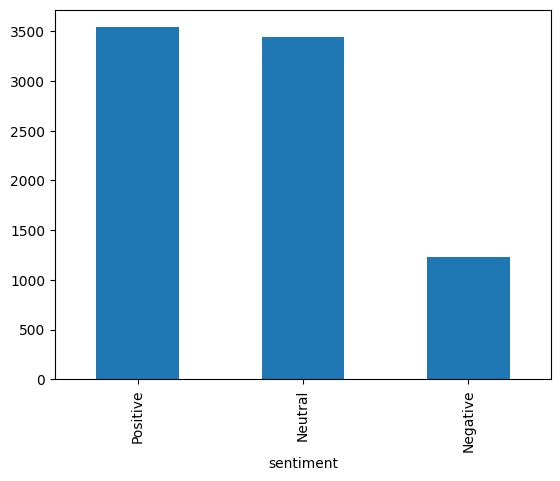

In [ ]:
df['sentiment'].value_counts().plot(kind='bar')

<Axes: xlabel='count', ylabel='sentiment'>

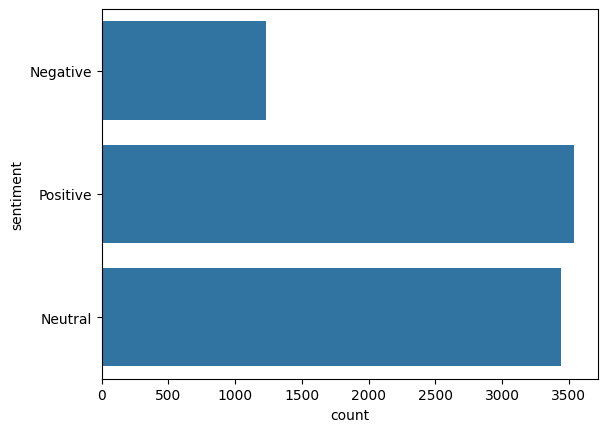

In [ ]:
#plot with seaborn
sns.countplot(df['sentiment'])

In [ ]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,extracted_hashtags,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624.0,950.0,18775.0,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,[],If I smelled the scent of hand sanitizers toda...,"{'polarity': -0.25, 'subjectivity': 0.25, 'sen...",-0.250000,0.250000,Negative
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253.0,1677.0,24.0,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,[],Hey and wouldnt it have made more sense to ha...,"{'polarity': 0.5, 'subjectivity': 0.5, 'sentim...",0.500000,0.500000,Positive
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275.0,9525.0,7254.0,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,[#COVID19],Trump never once claimed was a hoax We all cl...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197.0,987.0,1488.0,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,[#COVID19],The one gift has give me is an appreciation f...,"{'polarity': 0.0, 'subjectivity': 0.3571428571...",0.000000,0.357143,Neutral
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009.0,168.0,101.0,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,"[#CoronaVirusUpdates, #COVID19]",25 July : Media Bulletin on Novel,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8208,OpenMind eDesign,NOIDA,"Partnering with colleges, universities, and Ed...",2020-05-08 15:04:46,16.0,130.0,0.0,False,2020-07-25 07:11:31,The perfect #SaturdayThought of the week.\n\n#...,"['SaturdayThought', 'quoteoftheweek', 'quotes'...",Twitter Web App,False,"[#SaturdayThought, #quoteoftheweek, #quotes, #...",The perfect of the week,"{'polarity': 1.0, 'subjectivity': 1.0, 'sentim...",1.000000,1.000000,Positive
8209,Riikka Kevo,Finland,The Future is Here. #Covid19 #Urbanism #Optimi...,2017-02-19 13:09:04,659.0,1611.0,16309.0,False,2020-07-25 07:11:31,⁦@TheLancet Small study of #NeonatalManagemenA...,"['NeonatalManagemenAndOutcomes', 'COVID19']",Twitter for iPhone,False,"[#NeonatalManagemenAndOutcomes, #COVID19]",⁦ Small study of during pandemic tells us: Luc...,"{'polarity': 0.04166666666666666, 'subjectivit...",0.041667,0.616667,Positive
8210,Covid Tracking India,India,"Covind-19 news, facts, insights & analytics.\n...",2020-04-01 19:33:18,1423.0,321.0,334.0,False,2020-07-25 07:11:28,CDC: One-third of #COVID19 patients who aren't...,['COVID19'],Twitter Web App,False,[#COVID19],CDC: Onethird of patients who arent hospitaliz...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
8211,Daphne Jocelyn Lull,NaN,"Surface Pattern Designer & Zazzler Your ""go to...",2019-01-07 18:09:24,70.0,97.0,6612.0,False,2020-07-25 07:11:21,#COVID19 masks in solidarity with Spain https:...,['COVID19'],Twitter Web App,False,[#COVID19],masks in solidarity with Spain,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral


#Keyword Extraction
+ For Positive and Negative Sentiment
+ General


In [ ]:
positive_tweet=df[df['sentiment']=='Positive']['clean_tweet']
neutral_tweet=df[df['sentiment']=='Neutral']['clean_tweet']
negative_tweet=df[df['sentiment']=='Negative']['clean_tweet']

In [ ]:
positive_tweet

1       Hey and  wouldnt it have made more sense to ha...
6       How Will Change Work in General (and recruitin...
8               Praying for good health and recovery of  
12      👋🏻 — no one will be safe from until everyone i...
13      Lets all protect ourselves from Its real and t...
                              ...                        
8204    Absolutely love this Brilliant Morning all  le...
8205    With a hope to counter the staggering numbers ...
8207     claims 10 more lives in 3 from Ganjam 2 each ...
8208                             The perfect of the week 
8209    ⁦ Small study of during pandemic tells us: Luc...
Name: clean_tweet, Length: 3540, dtype: object

In [ ]:
#Remove stopwords and convert into tokens
positive_tweet_list=positive_tweet.apply(nfx.remove_stopwords).tolist()
negative_tweet_list=negative_tweet.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list=neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [ ]:
positive_tweet_list

['Hey wouldnt sense players pay respects A…',
 'Change Work General (and recruiting specifically) via/',
 'Praying good health recovery',
 '👋🏻 — safe safe commit ensure…',
 'Lets protect real numbers climbing fast Continent Lets n…',
 'Second wave Flandersback',
 'COVID Update: infection rate Florida following natural curve experts predicted initial cu…',
 'Good Patriots Volunteer Election Judge Polls open without…',
 'comprehensive review amp Analysis: key ways WASH help reduce transmission…',
 'crosses 2 lakh mark 150055 ppp recovered far positive today 6988/total…',
 'Actor father MrGKReddy tested positive 15/20 days s…',
 'safe place visit guests said hotel meticulous applying hand sanitation als…',
 'CEO live WSU talking “The effects Covid19 students”…',
 'Actionables healthy recovery',
 'understood hadnt missed meeting In…',
 'released new podcast episodes week: Technology Platforms Conduct Telehealth Visits C…',
 'reports 1142 positive cases 29 deaths Saturday Death toll rises 3

In [ ]:
negative_tweet_list

['smelled scent hand sanitizers today past think intoxicated that…',
 'deaths continue rise bad Politicians businesses want…',
 'image doesnt list source Id careful overall risk dying statistics related to…',
 'Im feeling little anxious detracted everyones…',
 'Britain didnt understand months plenty countries understand took effective…',
 'Crazy world come Americans fight this🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸',
 'sir mom ICU COVID want prayers listening',
 'aka Ill sending 500 people like amp retweet $300 $1500 Cas…',
 'time spike cases isvery hard reverse drastic lockdown time y…',
 'Hi long time preparation reopening homework',
 'OK Im angry believe stupidity virus kills must…',
 'weekend Yall pity year facing cant person…',
 'Shout Earth Hands worst reaction “emergency” I’ve seen Lottery shut and…',
 'Egyptians aint got shit',
 'Yes evidence increased Plus early guidance global PPE shortage priority to…',
 'Cum Check Ill DM Nudes',
 'worst type spread',
 'Agreed 💯% mean exactly problem travellers ❤️ needs

In [ ]:
neutral_tweet_list


['Trump claimed hoax claim effort to…',
 'gift appreciation simple things me…',
 '25 July : Media Bulletin Novel',
 'wear face coverings shopping includes visit local Community Pharmacy…',
 'POPE GOD Prophet Sadhu Sundar Selvaraj Watch',
 '49K+ Covid19 cases response cancel compartment exa…',
 'Order here:',
 'Rajasthan Government today started Plasma Bank Sawai Man Singh Hospital Jaipur treatment COVID19 pa…',
 'Nagaland police Covid19 Awareness City Tower Junction Dimapur',
 'July 25 update 6988 Discharge 7758 People tested 61729 Actice cases 52273 1329',
 'darkest moments focus',
 'Coronavirus South Africa: COVID19 update South Africa (24 July 2020)',
 'Holy water times',
 'Need Type : Bpositive : Jalappa Hospital Blood Component : Need Plasma B+ve recove…',
 'Munitions Response Team modified ops adopted masks disinfectants sanitizers…',
 'imagine people profiting human suffering studying maps 207…',
 'TAX Reform Taxfree minimum: company thousand euros year Taxfree minimum:…',
 'ack

In [ ]:
#Tokenization
for line in positive_tweet_list:
  #print(line)
  for token in line.split():
    print(token)

Streaming output truncated to the last 5000 lines.
BMW…
Shopping
amp
Special
Offers
Madhya
Pradesh
CM
Shivraj
Singh
Chouhan
Tests
Positive
Covid19
Coronavirus
time
capsule
buried
Glenrothes
signals
new
era
community
centre
Simple
cheap
available
friend
Dominic
Boris
need
set
shell
company
b…
Read
thread
usual
Trump
misconstrues
create
narrative
It’d
nice
effor…
Home
care
people
suspected
confirmed
COVID19:
Discount
50%
paper
publishing
+
Webinar
participation
offer
great
flat
rates
deliveries
Close
consulate
wants
China
🇨🇳
visit
rn
fr
serious…
➖➖➖➖➖➖➖➖➖➖➖
➕
24465
New
Cases
➕
1155
New
Deaths
➖➖➖➖➖➖➖➖➖➖➖
➡️
15955910
Cases
➡️
643040
D…
Total
positive
cases
Police
stand
8232
including
1825
active
cases
6314
recoveries…
State
Govt
announced
provide
Rs
7500/
handling
disposal
positive
dead…
Best
treatment
given
govt
hospitals
Telangana
based
guidelines
issued
by…
Big
disappointments:
amp
Romney
like
Flake
love
$$$
amp
power
told
Ame…
group
teenage
girls
Afghanistan
built
ventilator
old
car
p

In [ ]:
pos_tokens=[token for line in positive_tweet_list for token in line.split()]
neg_tokens=[token for line in negative_tweet_list for token in line.split()]
neut_tokens=[token for line in neutral_tweet_list for token in line.split()]

In [ ]:
pos_tokens

['Hey',
 'wouldnt',
 'sense',
 'players',
 'pay',
 'respects',
 'A…',
 'Change',
 'Work',
 'General',
 '(and',
 'recruiting',
 'specifically)',
 'via/',
 'Praying',
 'good',
 'health',
 'recovery',
 '👋🏻',
 '—',
 'safe',
 'safe',
 'commit',
 'ensure…',
 'Lets',
 'protect',
 'real',
 'numbers',
 'climbing',
 'fast',
 'Continent',
 'Lets',
 'n…',
 'Second',
 'wave',
 'Flandersback',
 'COVID',
 'Update:',
 'infection',
 'rate',
 'Florida',
 'following',
 'natural',
 'curve',
 'experts',
 'predicted',
 'initial',
 'cu…',
 'Good',
 'Patriots',
 'Volunteer',
 'Election',
 'Judge',
 'Polls',
 'open',
 'without…',
 'comprehensive',
 'review',
 'amp',
 'Analysis:',
 'key',
 'ways',
 'WASH',
 'help',
 'reduce',
 'transmission…',
 'crosses',
 '2',
 'lakh',
 'mark',
 '150055',
 'ppp',
 'recovered',
 'far',
 'positive',
 'today',
 '6988/total…',
 'Actor',
 'father',
 'MrGKReddy',
 'tested',
 'positive',
 '15/20',
 'days',
 's…',
 'safe',
 'place',
 'visit',
 'guests',
 'said',
 'hotel',
 'meticulous

In [ ]:
#get the most common keywords
from collections import Counter

def get_tokens(docx, num=30):
    # Count occurrences of each token
    word_tokens = Counter(docx)

    # Get the most common tokens
    most_common = word_tokens.most_common(num)

    # Convert most common tokens into a dictionary
    result = dict(most_common)

    # Return the result
    return result


In [ ]:
get_tokens(pos_tokens)

{'cases': 510,
 'new': 448,
 'positive': 268,
 'amp': 196,
 'people': 164,
 'New': 144,
 'COVID19': 141,
 'tested': 130,
 'deaths': 126,
 'tests': 104,
 'pandemic': 91,
 'Covid19': 88,
 '|': 85,
 'confirmed': 84,
 'safe': 78,
 'reported': 78,
 'good': 77,
 'CM': 75,
 'day': 75,
 'like': 73,
 'total': 70,
 'latest': 70,
 'number': 69,
 'July': 68,
 'help': 67,
 'time': 67,
 'health': 66,
 'today': 65,
 'Pradesh': 65,
 'great': 64}

In [ ]:
most_common_pos_words= get_tokens(pos_tokens)
most_common_neg_words= get_tokens(neg_tokens)
most_common_neut_words= get_tokens(neut_tokens)

In [ ]:

neg_df= pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])

In [ ]:
neg_df

,words,scores
0,cases,173
1,spread,120
2,risk,116
3,slow,113
4,daily,109
5,Help,105
6,symptoms,105
7,identify,104
8,sooner,103
9,selfreporting,103


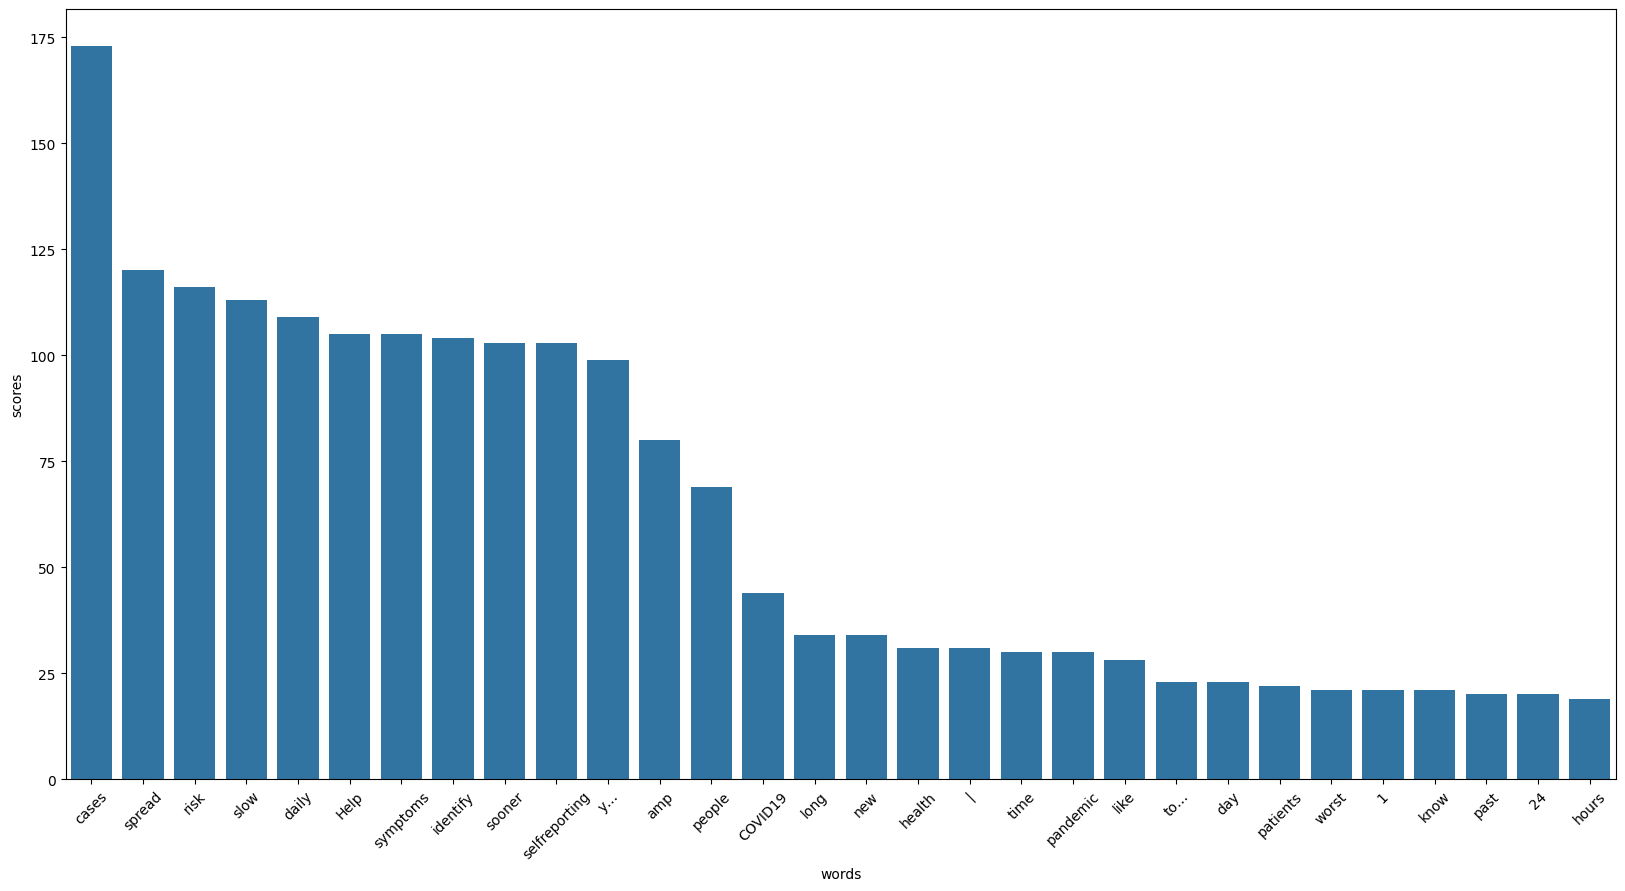

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.barplot(x='words',y='scores',data=neg_df)
plt.show()

In [ ]:
pos_df= pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
neut_df= pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])

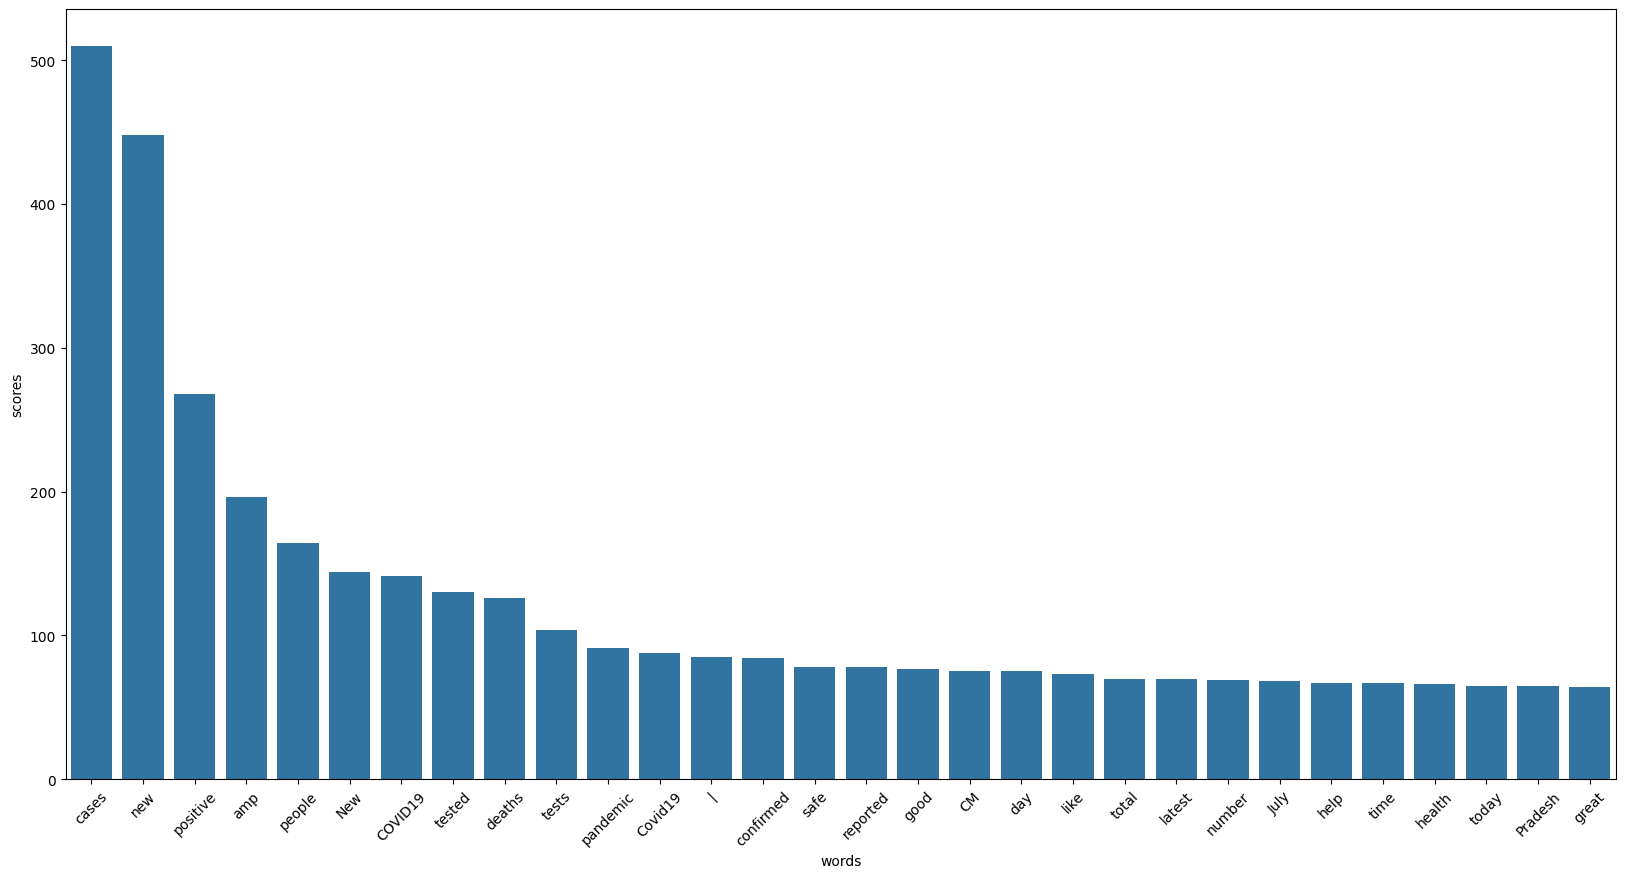

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.barplot(x='words',y='scores',data=pos_df)
plt.show()

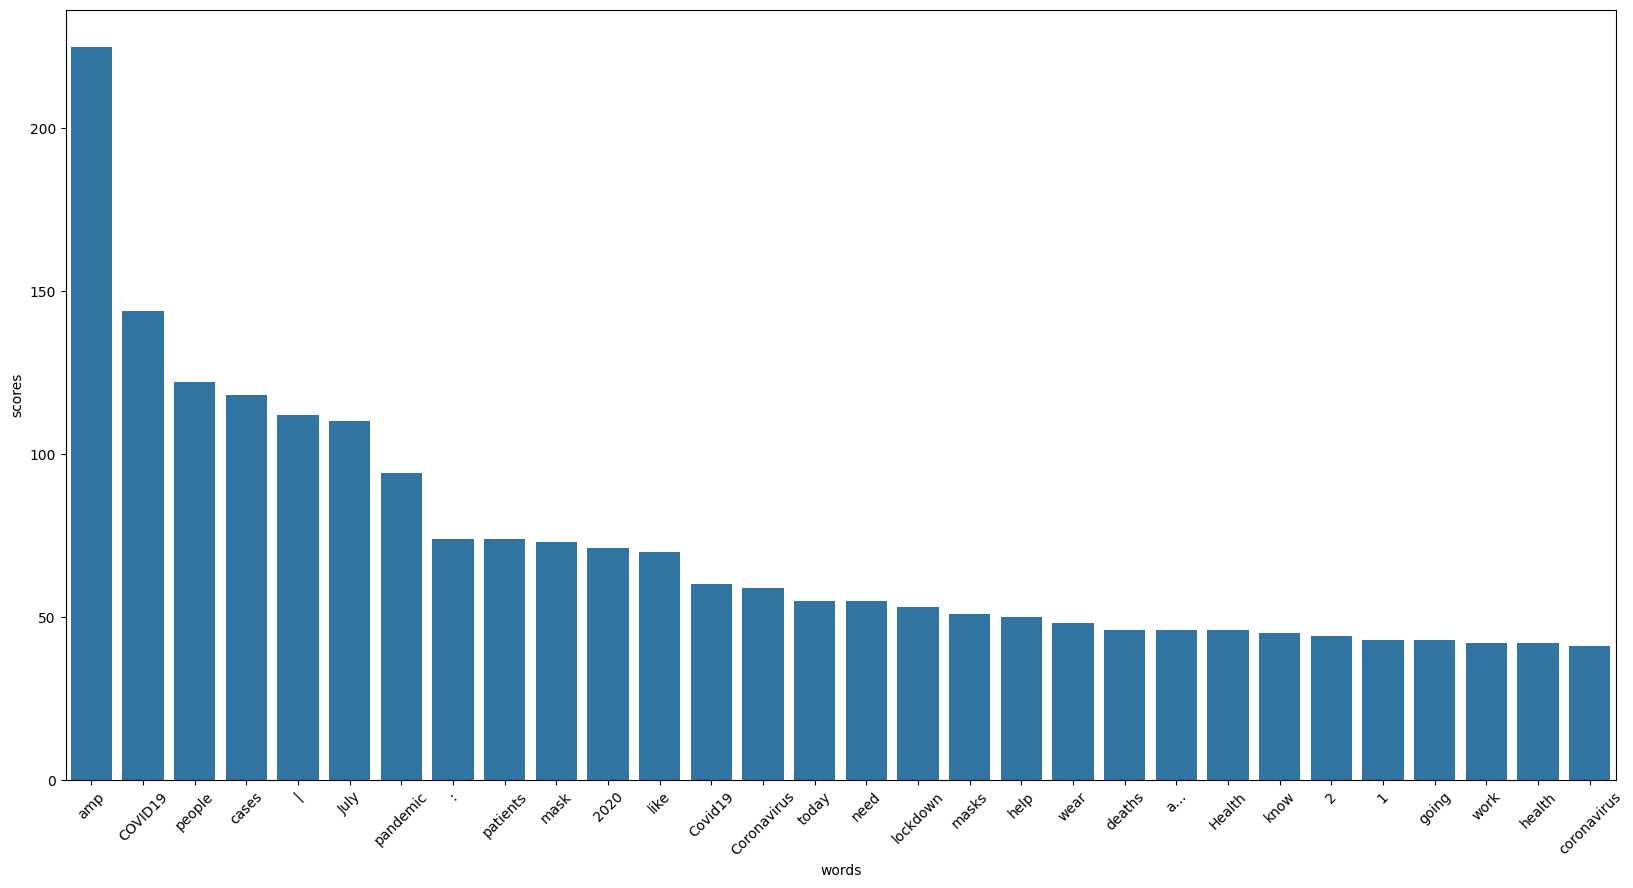

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.barplot(x='words',y='scores',data=neut_df)
plt.show()

In [ ]:
from wordcloud import WordCloud

In [ ]:
def plot_wordcloud(docx):
  mywordcloud= WordCloud().generate(docx)
  plt.imshow(mywordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.show()

In [ ]:
pos_docx=' '.join(pos_tokens)
neg_docx=' '.join(neg_tokens)
neut_docx=' '.join(neut_tokens)

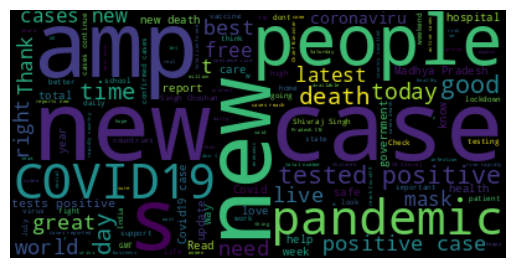

In [ ]:
plot_wordcloud(pos_docx)

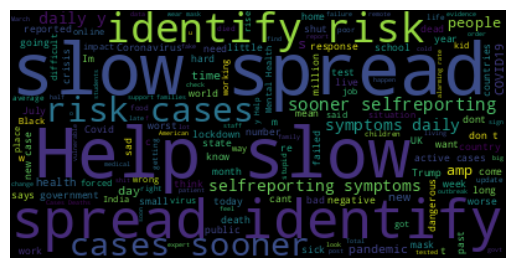

In [ ]:
plot_wordcloud(neg_docx)

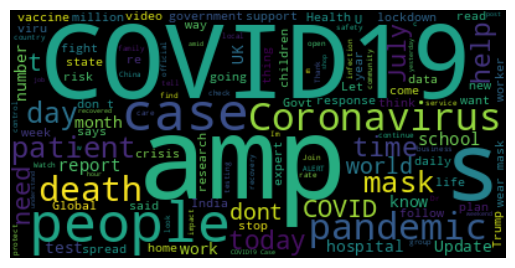

In [ ]:
plot_wordcloud(neut_docx)